<a href="https://colab.research.google.com/github/wavallejol/ColabChem/blob/main/Sesi%C3%B3n4_EoS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sesión 4. Ecuaciones de Estado (EoS)**
# **Objetivos**
 
 
1.   Representar el comportamiento termodinámico de los gases  utilizando Google Colabs
2.   Utilizar funciones para la creación de rutinas
---

# **Introducción**

<div align="justify">El estado termodinámico de los gases puede ser estudiado por medio de una ecuación algebráica que relaciona diferentes funciones de estado ($\small P, V, T $) del gas, ésta ecuación se conoce como  <a href="https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_estado">ecuación de estado</a>.  (EoS, por sus siglas en inglés). Existen diferentes tipos de ecuaciones de estado: (i) Ecuaión del gas ideal, (ii) ecuación Virial, (iii) ecuaciones analíticas y (iv) ecuaciones no analíticas de estado. Un tipo especial de ecuaciones, son las EoS analíticas. Estas ecuaciones son funciones $\small f_{v}(T,V)$ que tienen exponentes del $\small V$ no mayores de la cuarta potencia. Existe una ecuación general que permite representar todas las EoS cúbicas (Abbott, 1979. Fuente:<a href="https://books.google.com.co/books/about/The_Properties_of_Gases_and_Liquids_5E.html?id=9tGclC3ZRX0C&redir_esc=y"> B. Poling et.al., The properties of Gases and Liquids</a>):</div>

$\small P=\frac{RT}{\bar{V}-b}-\frac{\Theta(\bar{V}-\eta)}{(\bar{V}-b)(V^{2}+\delta \bar{V}+\varepsilon )} \kern 2pc (1)$ 

<div align="justify">Dónde dependiendo del modelo, los parámetros $\small \Theta, b, \eta, \delta, \varepsilon$ pueden ser constantes o pueden variar con T y la composición. La EoS más sencilla es la ecuación de los gases ideales, para este caso todos lo parámetros se hacen cero (puedes revisar  <a href="https://github.com/wavallejol/ColabChem/blob/main/Sesi%C3%B3n3_Gases_Ideales.ipynb">la sesión 3</a>  para ver algunos ejemplos). En la tabla 1 se listan los valores de los parámetros de algunas EoS de Vander Waals y Redlich-Kwong. </div>

<div align = "center">Tabla 1. Valores parámetros ec. 1 EoS de Vander Waals y Redlich-Kwong. (Fuente:<a href="https://books.google.com.co/books/about/The_Properties_of_Gases_and_Liquids_5E.html?id=9tGclC3ZRX0C&redir_esc=y"> B. Poling et.al., The properties of Gases and Liquids</a>).</div>
 
Nombre EoS|$\small \delta$ | $\small \varepsilon$| $\small \Theta$| $\small \eta$
-------------------|------------------|------------------|------------------|------------------
Van der Waals | $\small 0$ | $\small 0$ | $\small a$ |$\small b$  
Redlich Kwong | $\small b$ | $\small 0$ | $\small a/T^{0.5}$|$\small b$ 
 
A continuación estudiarémos dos casos de las EoS cúbicas: (i) la ecuación de Van der Waals y (ii) la ecuación de Redlich-Kwong.

#***Actividad 1: Funciones en Python***

Una función en python permite ejecutar una operación deseada con base en parámetros previamente definidos. La operación deseada puede ser ejecutada cuando se necesite utilizando el nombre asociado a dicha función. Para definir una función usaremos el comando `def`, después de este comando se colocará el nombre de nuestra función y después los argumentos de la función; la primera línea de la rutina se finaliza con dos puntos. Después colocamos nuestra función matemática; finalmente, en la ultima línea de la función colocamos el comando `return` seguido del nombre de la función definida. Utilicemos el siguiente ejemplo para mostrar los principales elementos de las funciones. Deseamos crear una función que genere cualquier potencia  de un numero deseado.

In [ ]:
def potencia(numero, exponente):  # definimos el nombre de la función y sus argumentos
  potencia=numero**exponente      # definimos la ecuación matemática
  return potencia                 # retornamos el resultado de la función

una vez definida, la función puede ser llamada cuando necesitemos. 
A continuación utilizaremos la función que acabamos de crear (`potencia`) para obtener el resultado de la operación $\small 2^{32}$. Primero escribimos el nombre de la función seguido de un paréntesis donde se indicaran los argumentos de la función:

In [ ]:
potencia(2,32)

Utiliza la función que acabamos de crear para resolver las siguientes operaciones: $\small 144^{1/2}$ y $\small 2^{-1/2}$.
Puedes revisar un tutorial sobre funciones en el siguiente link: <a href="https://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook4_functions/py_exploratory_comp_4.ipynb#ex1answer"> Funciones</a>


*Ejercicio 1:* La función <a href="https://es.wikipedia.org/wiki/Funci%C3%B3n_cuadr%C3%A1tica">cuadrática</a> tiene la forma general:

$\small Ax^{2}+Bx+C=0\kern 2pc (1)$ 

Donde los coeficientes A, B y C son numeros reales. La resolución de las dos raices de la ecuación cuadrática pue ser expresada de la siguiente manera:

$\small x=\frac {-B\pm\sqrt{B^{2}-4AC}}{2A}\kern 2pc (2)$ 

A partir de la información revisada, crea una funcion que resuelva la siguiente ecuación cuadrática:


$\small x^{2}+3x+2=0\kern 2pc (3)$ 

#***Actividad 2: Ecuación de Van der Waals***

<div align="justify">En la ecuación de <a href="https://es.m.wikipedia.org/wiki/Ecuaci%C3%B3n_de_Van_der_Waals#:~:text=La%20ecuaci%C3%B3n%20de%20Van%20der,fuerzas%20de%20Van%20der%20Waals."> Van der Waals</a> los parámetros de la ec. 1 toman los valores especificados en la tabla 1:

$\small P=\frac{RT}{(\bar{V}-b)}-\frac{a}{\bar{V}^2} \kern 2pc (4)$ 

Dónde los parámetros $\small a, b$ son constantes específicas para cada gas y R es la constante de los gases. Los valores de estas constantes se pueden determinar de acuerdo a el estado termodinámico del punto crítico:

$\small a=(\frac{27}{64})\frac{T_{c}^{2}R^{2}}{P_{c}} \kern 2pc (5)$ 
 
$\small b=(\frac{1}{8})\frac{RT_{c}}{P_{c}} \kern 2pc (6)$ 
 
Donde $\small (T_{c})$ y $\small (P_{c})$ corresponden a la temperatura y presión crítica del gas. 

Con la información suministrada, ahora compararémos el diagrama $\small (P  \bar{V})$ para un mol de metano utilizando la ecuación de Vander Waals a los siguientes valores de temperatura crítica ($\small 0.11T_{c}, 0.6T_{c}, 0.9T_{c}, 2.0T_{c})$. Compara los resultados con la curva de gases ideales.

Para resolver este ejercicio primero importamos las bibliotecas que utilizarémos, definiremos las variables y finalmente la fución para describir la ecuación de Van der Waals. El nombre de nuestra función sera ("Pvw") y los argumentos de la función ($\small T$ y $\small \bar V$).</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
R, Tc, Pc= 8.314, 190.4, 4.6e6
a,b =(27/64)*Tc**2*R**2/Pc, (Tc*R)/(Pc*8)  #Definimos los parámetros de la ecuación

def Pvw(T,Vm):                             #Ec. Van der Waals
    Pvw=R*T/(Vm-b)- a/(Vm**2)
    return Pvw

Fuente del código:<a href="https://nbviewer.jupyter.org/github/iurisegtovich/PyTherm-applied-thermodynamics/blob/master/contents/main-lectures/2-numpy-matplotlib-vdW-EoS-isotherms.ipynb">  PyTherm-applied-thermodynamics</a>


Una de las grandes ventajas de las herramientas informáticas es la posibilidad de automatizar tareas repetitivas donde nosotros los humanos facilmente podríamos cometer errores. El bucle `for` es una de las herramientas que podemos utilizar en python para realizar este tipo de operaciones repetitivas conocidas como iteraciones. 

Primero escribimos la sentencia `for` seguido de la variable que deseamos iterar, luego se debe colocar la sentencia `in` indicando después los valores que deberá tomar nuestra variable, finalizamos esta línea de código con dos puntos, en esta linea de código hemos definido la condición de la iteración. En la siguiente línea de código se establece la operación que deseamos iterar. Pueder revisar algunos ejemplos del bucle `for` en el siguiente link: <a href="https://www.w3schools.com/python/python_for_loops.asp">  Phyton for Loops</a>.

Ahora, utilizaremos el bucle `for` para obtener el diagrama $\small (P  \bar{V})$ a cada una de las temperaturas establecidas en el ejercicio.

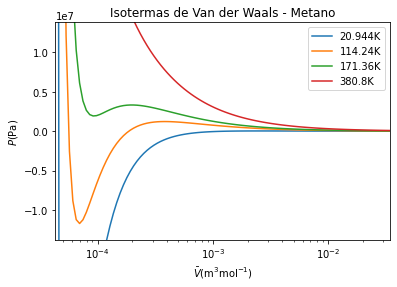

In [ ]:
fig = plt.figure(1)
for T in np.array([0.11,0.6,0.9,2])*Tc:                           #Definimos la condición de la iteración
    Vm=np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),100)    #utilizamos escala logarítmica
    plt.semilogx(Vm,Pvw(T,Vm), label=str(T)+"K")                #definimos los paramétros de la grafica
    plt.title("Isotermas de Van der Waals - Metano")            
    plt.ylabel(r"$ {P (\mathrm{Pa})} $")                    
    plt.xlabel(r"$ \bar{V}(\mathrm{m^{3}mol^{-1}}) $")         
    plt.ylim(-3*Pc,Pc*3)                                        
    plt.xlim(b,(100*R*Tc/Pc))                                   
plt.legend()
plt.show()

Ahora obtengamos la grafica utilizando la ecuación de los gases ideales.

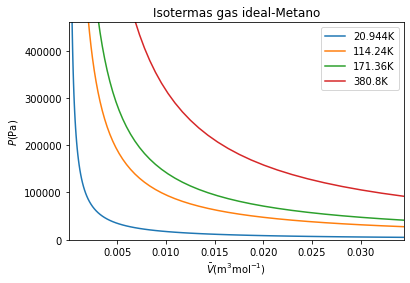

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
def P(T,Vm):               #Ec. gases ideales
    P=8.314*T/Vm
    return P
fig = plt.figure(1)

for T in np.array([0.11,0.6,0.9,2])*Tc: 
    Vm=np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),100)           
    plt.plot(Vm, P(T,Vm), label=str(T)+"K")              
    plt.title("Isotermas gas ideal-Metano")            
    plt.ylabel(r"$ {P (\mathrm{Pa})} $")                    
    plt.xlabel(r"$ \bar{V}(\mathrm{m^{3}mol^{-1}}) $")
    plt.ylim(0,Pc/10)                                        
    plt.xlim(b,(100*R*Tc/Pc))                                          
plt.legend()
plt.show()


*Ejercicio 2:* Modifica la rutina de la celda de código anterior y grafíca el diagrama $\small P vs \bar{V}$ para un mol de $\small CCl_{4(g)}$ utilizando la ecuación de Van der Waals. Los valores de las temperatura y presión crítica puden obtenerse del siguiente lonk  <a href="https://es.wikipedia.org/wiki/Cloruro_de_carbono(IV)"> $\small CCl_{4(g)}$</a> 


#***Actividad 3: Ecuación de Redlich Kwong***

En la ecuación de <a href="https://es.wikipedia.org/wiki/Ecuaci%C3%B3n_de_estado_Redlich%E2%80%93Kwong"> Redlich Kwong</a> los parámetros de la ec. 1 toman los valores especificados en la tabla 1:

$\small P=\frac{RT}{(\bar{V}-b)}-\frac{a}{T^{0.5}(\bar{V}^2+b\bar{V})} \kern 2pc (7)$ 

Dónde los parámetros $\small a, b$ son constantes específicas para cada gas y sus valores se pueden determinar de acuerdo a las condiciones termodinámicas del punto crítico:

$\small a=0.42748\frac{T_{c}^{2.5}R^{2}}{P_{c}} \kern 2pc (8)$ 
 
$\small b=0.08664\frac{RT_{c}}{P_{c}} \kern 2pc (9)$ 
 
Dónde $\small (T_{c})$ y $\small (P_{c})$ corresponden a la temperatura y presión crítica del gas. 

*Ejercicio 3:* Con la información suministrada, ahora deberás comparar el diagrama $\small (P  \bar{V})$ para un mol de metano utilizando la ecuación de Redlich-Kwong a los siguientes valores de temperatura crítica ($\small 0.11,0.6,0.9,2.0)$.

# ***Actividad 4: Solución de las actividades***
---
En esta sección se presentan las soluciones de las actividades que desarrollaste en las secciones anteriores. 

*Solución ejercicio 1:* Ejecuta la rutina mostrada en la siguiente celda de código.

In [ ]:
from math import *
def cuadratica(A,B,C):            # definimos el nombre y los argumentos
  X1=(-B+sqrt(B**2-4*A*C))/2*A    # la ecuación de la primera raiz
  X2=(-B-sqrt(B**2-4*A*C))/2*A    # la ecuación de la segunda raiz
  return X1,X2

Una vez creada la función podremos llamarla y utilizar los argumentos definidos en el ejercicio (A= 1, B=3, C=2)

In [ ]:
cuadratica(1,3,2)   

(-1.0, -2.0)

*Solución ejercicio 2:* Utilizando los valores de la temperatura y presión crítica reportadas para el $\small CCl_{4(g)}$ y la rutina presentada en la actividad 1.

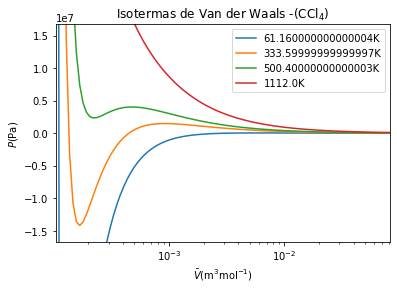

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
R, Tc, Pc= 8.314, 556, 5.57e6
a, b= (27/64)*Tc**2*R**2/Pc, (Tc*R)/(Pc*8) 

def Pvw(T,Vm):                    
    Pvw=R*T/(Vm-b)- a/(Vm**2)
    return Pvw

fig = plt.figure(1)
for T in np.array([0.11,0.6,0.9,2])*Tc:                 
    Vm=np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),100)    
    plt.semilogx(Vm,Pvw(T,Vm), label=str(T)+"K")               
    plt.title("Isotermas de Van der Waals -" r"$ (\mathrm{CCl_{4}}) $")            
    plt.ylabel(r"$ {P (\mathrm{Pa})} $")                    
    plt.xlabel(r"$ \bar{V}(\mathrm{m^{3}mol^{-1}}) $")         
    plt.ylim(-3*Pc,Pc*3)                                        
    plt.xlim(b,(100*R*Tc/Pc))                                   
plt.legend()
plt.show()

*Solución ejercicio 3:* Utilizando los valores de la temperatura y presión crítica reportadas para el metano y la rutina presentada en la actividad 2.

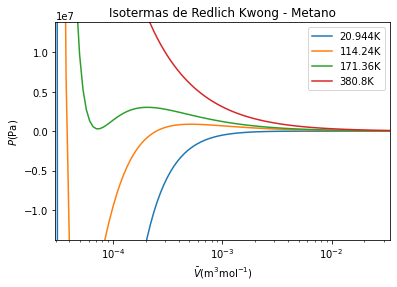

In [1]:
import numpy as np
import matplotlib.pyplot as plt

R, Tc, Pc= 8.314, 190.4, 4.6e6
a, b = 0.42748*Tc**2.5*R**2/Pc, 0.08664*(Tc*R)/(Pc) 

def Prk(T,Vm):                                                  
    Prk=R*T/(Vm-b)- a/(T**0.5*(Vm**2+b*Vm))
    return Prk

fig = plt.figure(1)
for T in np.array([0.11,0.6,0.9,2])*Tc:                 
    Vm=np.logspace(np.log10(b*1.01),2+np.log10(R*Tc/Pc),100)   
    plt.semilogx(Vm,Prk(T,Vm), label=str(T)+"K")               
    plt.title("Isotermas de Redlich Kwong - Metano")            
    plt.ylabel(r"$ {P (\mathrm{Pa})} $")                    
    plt.xlabel(r"$ \bar{V}(\mathrm{m^{3}mol^{-1}}) $")         
    plt.ylim(-3*Pc,Pc*3)                                        
    plt.xlim(b,(100*R*Tc/Pc))                                   
plt.legend()
plt.show()

---
#***Enlaces Recomendados***
 
*  Tutorial de `numpy`: <a href="http://facundoq.github.io/courses/images/res/03_numpy.html">numpy</a>
*  Tutorial de `math`: <a href="https://docs.python.org/es/3/library/math.html">math</a>
*  Tutorial funciones <a href="https://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook4_functions/py_exploratory_comp_4.ipynb#ex1answer"> Funciones</a>
*  Tutorial de matemáticas en phyton: (i) <a href="https://interactivechaos.com/es/manual/tutorial-de-python/variables">Matematicas en Phyton</a> (ii) <a href="https://personal.math.ubc.ca/~pwalls/math-python/jupyter/notebook/">Mathematical Phyton</a>
*  Tutorial de Álgebra lineal: <a href="https://relopezbriega.github.io/blog/2015/06/14/algebra-lineal-con-python/"> Álgebra Lineal con Phyton</a>
*  Manual de NumPy: <a href="https://numpy.org/doc/stable/index.html">NumPy v1.21</a>
*  Manual sentencia `for`: <a href="https://docs.python.org/es/3/tutorial/controlflow.html">Sentencia for</a>



#***Referencias***
*  NumPy, matplotlib and the Van der Waals Equation of State isotherms. <a href="https://nbviewer.jupyter.org/github/iurisegtovich/PyTherm-applied-thermodynamics/blob/master/contents/main-lectures/2-numpy-matplotlib-vdW-EoS-isotherms.ipynb">  PyTherm-applied-thermodynamics</a>.

*  B. E. Poling, J. M. Prausnitz, J.P. O'Connell. (2001). The properties of Gases and Liquids. Ed. 5th. McGraw-Hill. pp. 128.

